In [1]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

In [2]:
"""
Utils for the rest of the work
"""

import math

def rotation_matrix(angle):
    """
    The technique to find the content of the matrix is easy:
    - try to map the point (x,y) = (1,0)
    - try to map the point (x,y) = (0,1)
    - make sure the determinant is 1 (cos 2 + sin 2)
    """
    return np.array([
        [math.cos(angle), -1 * math.sin(angle)],
        [math.sin(angle), math.cos(angle)]])

def apply_rotation(x, y, rad):
    M = rotation_matrix(rad)
    coords = np.stack((x, y), axis=-1) # Zip
    coords = np.matmul(coords, np.transpose(M)) # Why does it work ? Shouldn't it be the other way around?
    x, y = np.split(coords, 2, axis=-1) # Unzip
    return np.squeeze(x, axis=-1), np.squeeze(y, axis=-1)

In [3]:
'''
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])
z = np.stack((x, y), axis=-1)
print(z)
x, y = np.split(z, 2, axis=-1)
print(x)
print(y)
'''

x = np.array([1, 2, 3])
y = np.array([5, 6])
X, Y = np.meshgrid(x, y)
# print(X)
# print(Y)
# Z = np.stack((X, Y), axis=-1)
# print(Z)
# X, Y = np.split(Z, 2, axis=-1)
# print(X)
# print(Y)

X, Y = apply_rotation(X, Y, math.pi / 2)
print(X)
print(Y)

X, Y = apply_rotation(X, Y, math.pi / 2)
print(X)
print(Y)

print(apply_rotation(x=[1, 0], y=[0, 1], rad=math.pi / 2))

[[-5. -5. -5.]
 [-6. -6. -6.]]
[[1. 2. 3.]
 [1. 2. 3.]]
[[-1. -2. -3.]
 [-1. -2. -3.]]
[[-5. -5. -5.]
 [-6. -6. -6.]]
(array([ 6.123234e-17, -1.000000e+00]), array([1.000000e+00, 6.123234e-17]))


In [ ]:
"""
Create a simple 1D curve and show:
1) what a gradient descent would do
2) what newton's method would do
"""

# TODO

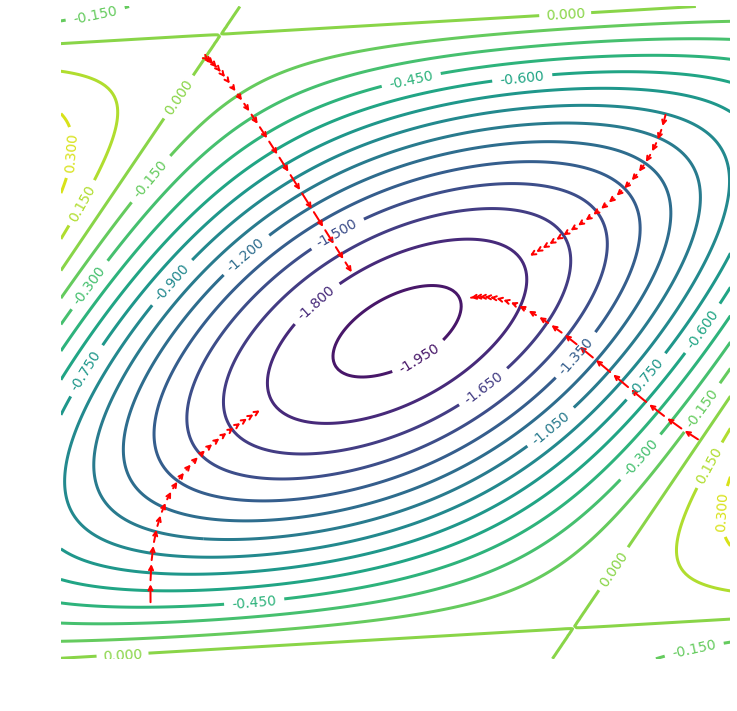

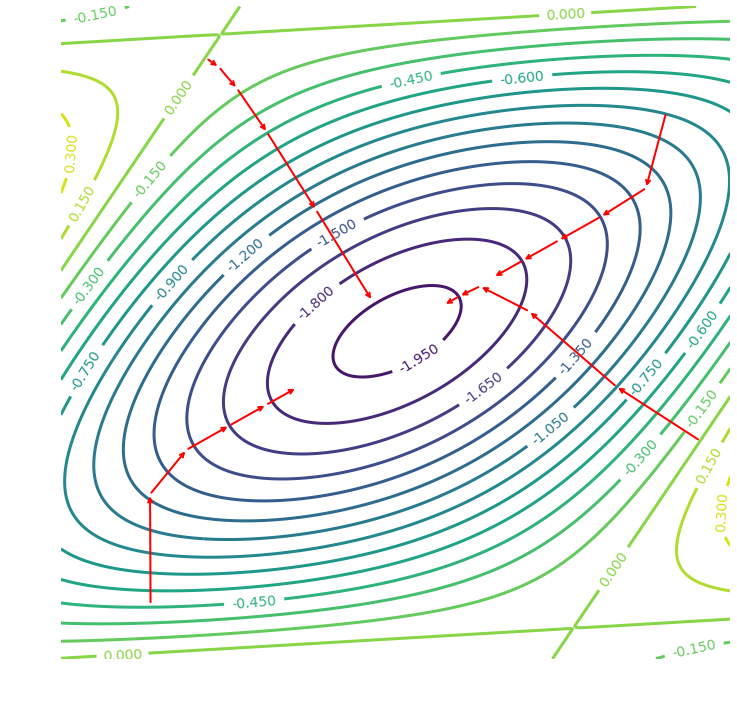

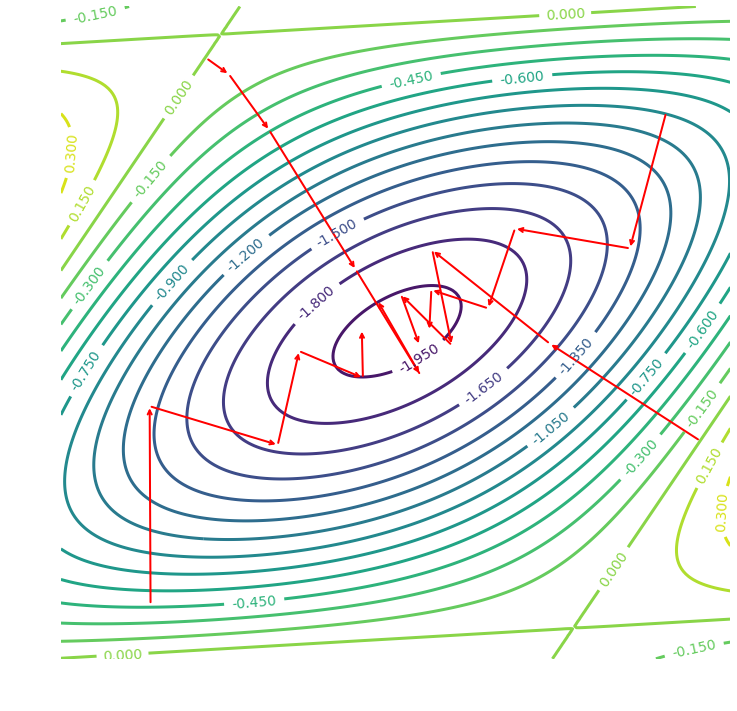

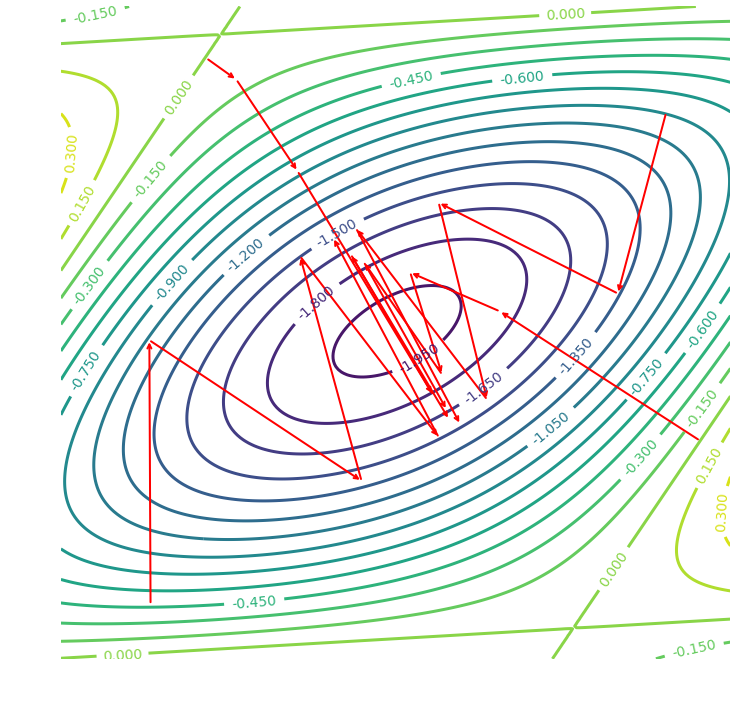

In [13]:
"""
Create a simple 2D curve and show:
1) what a gradient descent would do:
    * what the effect of the learning rate is
    * what the effect of gradient clipping is
2) what newton's method would do
"""

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)

# Computing the function as a rotation followed by sinusoids
rotation_rad = - math.pi / 6
U, V = apply_rotation(X, Y, rad=rotation_rad)
F = - np.cos(U / 2) - np.cos(V)

# Compute the gradient for the provided coordinates
def gradient_at(x, y):
    theta = rotation_rad
    u, v = apply_rotation(x, y, rad=theta)
    df_du = 0.5 * np.sin(u * 0.5)
    df_dv = np.sin(v)
    # That would be the chain rule: it is just a rotation in other direction
    # du_dx = math.cos(theta)
    # du_dy = - math.sin(theta)
    # dv_dx = math.sin(theta)
    # dv_dy = math.cos(theta)
    # df_dx = df_du * du_dx + df_dv * dv_dx
    # df_dy = df_du * du_dy + df_dv * dv_dy
    df_dx, df_dy = apply_rotation(df_du, df_dv, rad=-theta)
    return np.stack((df_dx, df_dy), axis=-1)

def show_gradient_descent(lr: float, iteration_count: int):
    # Display the graph of the contours of the function F in terms of X and Y
    fig, ax = plt.subplots(figsize=(12, 12))
    CS = ax.contour(X, Y, F, levels=20, linewidths=3, antialiased=True)
    ax.clabel(CS, inline=1, fontsize=14)

    # Display the gradiants from a bunch of starting points
    curr_x = np.array([-2.2 ,2.4, -1.7, 2.7])
    curr_y = np.array([-2.5, 2.0, 2.5, -1.0])
    for _ in range(iteration_count):
        next_x, next_y = [], []
        grad = gradient_at(curr_x, curr_y)
        for i in range(len(curr_x)):
            next_x.append(curr_x[i] - lr * grad[i][0])
            next_y.append(curr_y[i] - lr * grad[i][1])
            src = curr_x[i], curr_y[i]
            dst = next_x[-1], next_y[-1]
            ax.annotate('', xy=dst, xytext=src, arrowprops={'arrowstyle': '->', 'color': 'red', 'lw': 2})
        curr_x = np.array(next_x)
        curr_y = np.array(next_y)

    # Show the whole thing
    ax.set_axis_off()
    plt.xlabel('X1', fontsize=18, labelpad=10)
    plt.ylabel('X2', fontsize=18, rotation=0, labelpad=20)
    plt.show()


# Show the effect of increasing learning rates
show_gradient_descent(lr=0.2, iteration_count=20)
show_gradient_descent(lr=1.0, iteration_count=5)
show_gradient_descent(lr=1.8, iteration_count=5)
show_gradient_descent(lr=2.4, iteration_count=5)

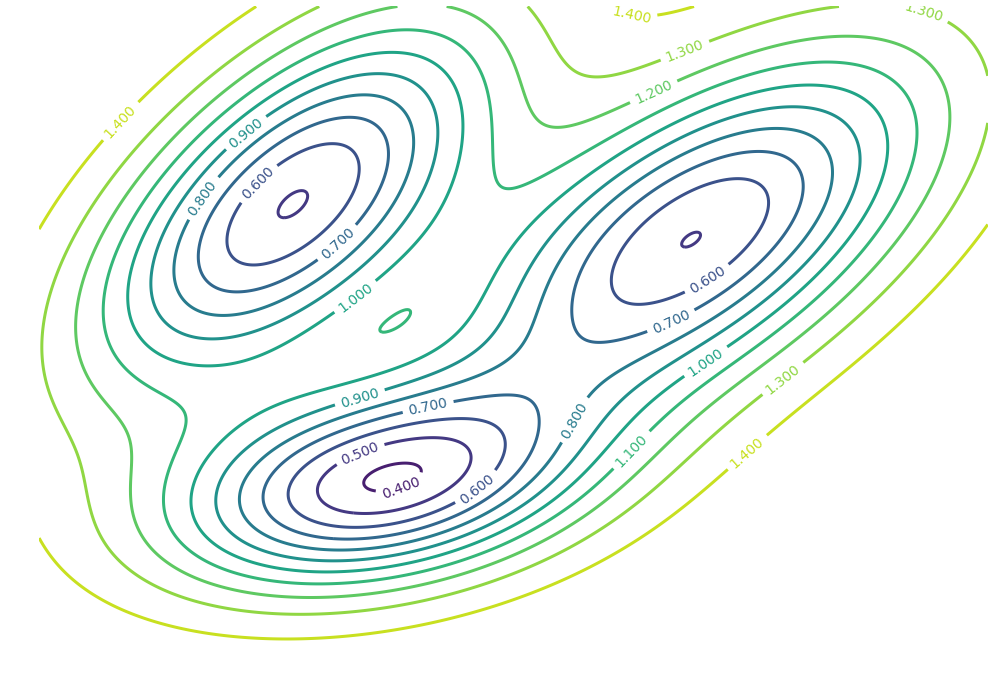

In [13]:
"""
Create a complex 2D curve and show:
1) what a gradient descent would do
2) what newton's method would do
"""

delta = 0.025
x = np.arange(-8.0, 8.0, delta)
y = np.arange(-6.0, 8.0, delta)
X, Y = np.meshgrid(x, y)

Z = 1.5 - np.exp(-(0.01 * (3*(X-2) - Y) ** 2 + 0.01 * (3*(Y-2) - X) ** 2)) \
        - np.exp(-(0.01 * (3*(X+5) - Y) ** 2 + 0.01 * (3*(Y-5) - X) ** 2)) \
        - np.exp(-(0.01 * (3*(X+2) - 0.5 * Y) ** 2 + 0.01 * (4*(Y+2) - 0.5 * X) ** 2))

Z = 1.5 - np.exp(-(0.01 * (3*(X-2) - Y) ** 2 + 0.01 * (3*(Y-2) - X) ** 2)) \
        - np.exp(-(0.015 * (3*(X+5) - Y) ** 2 + 0.01 * (3*(Y-5) - X) ** 2)) \
        - np.exp(-(0.01 * (3*(X+2) - 0.5 * Y) ** 2 + 0.015 * (4*(Y+2) - 0.5 * X) ** 2))

fig, ax = plt.subplots(figsize=(17, 12))
CS = ax.contour(X, Y, Z, levels=12, linewidths=3, antialiased=True)
ax.clabel(CS, inline=1, fontsize=14)

# ax.get_xaxis().set_visible(False) # Hide the X axis
# ax.get_yaxis().set_visible(False) # Hide the Y axis
ax.set_axis_off() # Hide the axis

ax.get_xaxis().set_ticks([]) # only hide the labels
ax.get_yaxis().set_ticks([]) # only hide the labels

plt.xlabel('X1', fontsize=18, labelpad=10)
plt.ylabel('X2', fontsize=18, rotation=0, labelpad=20)
# plt.grid(True)
plt.show()